In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("jobs.csv")
print(data.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

In [2]:
data = data.drop("Unnamed: 0",axis=1)

In [3]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

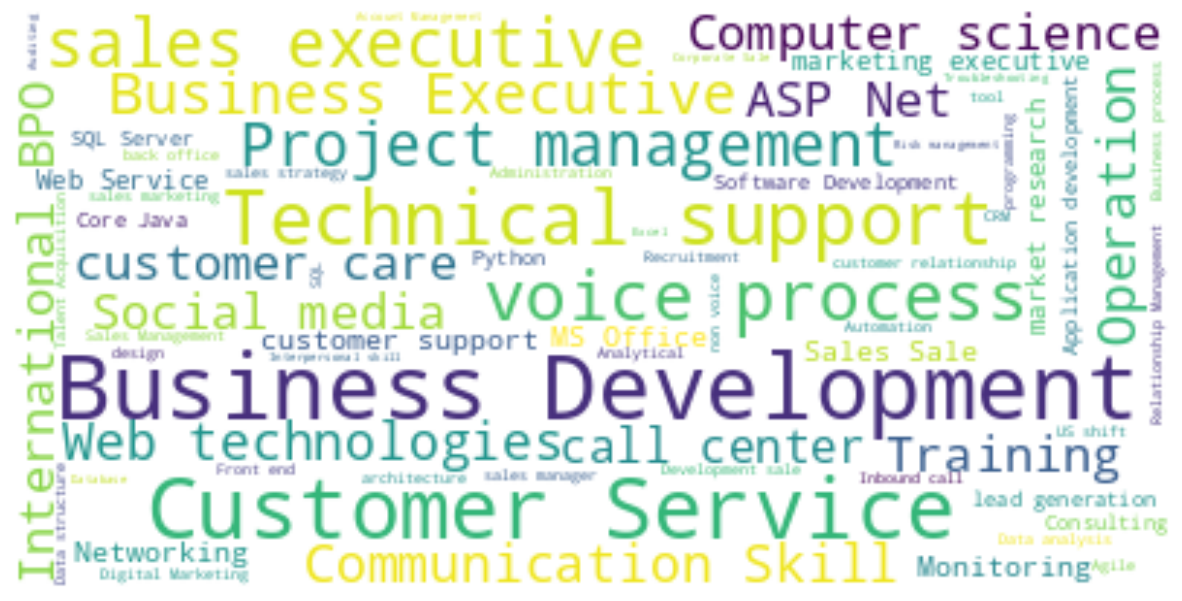

In [4]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

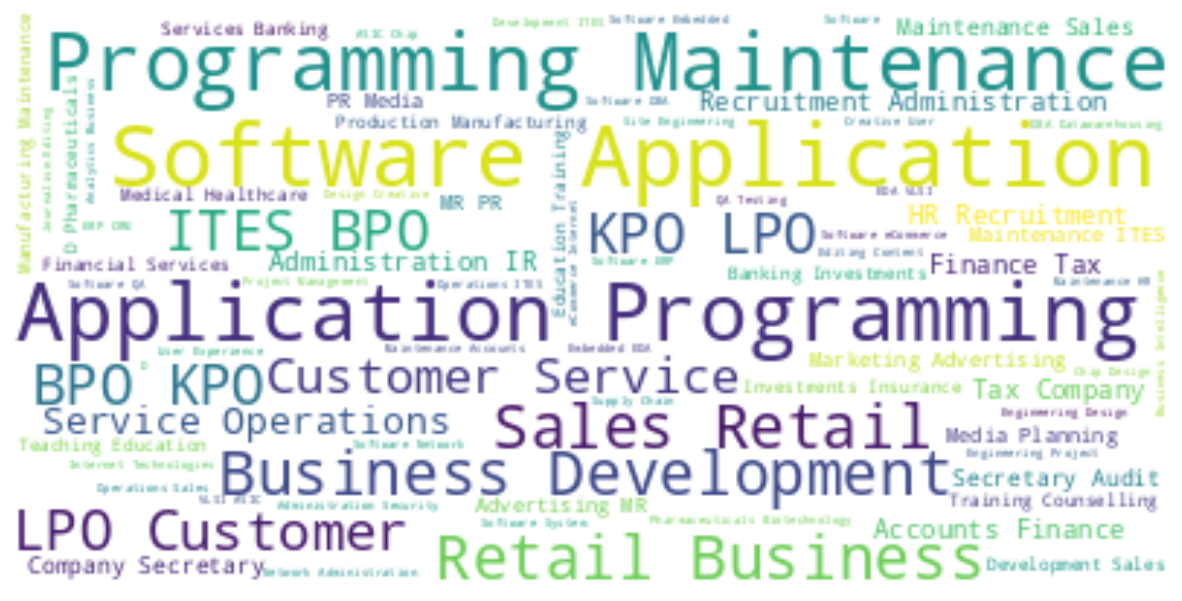

In [5]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

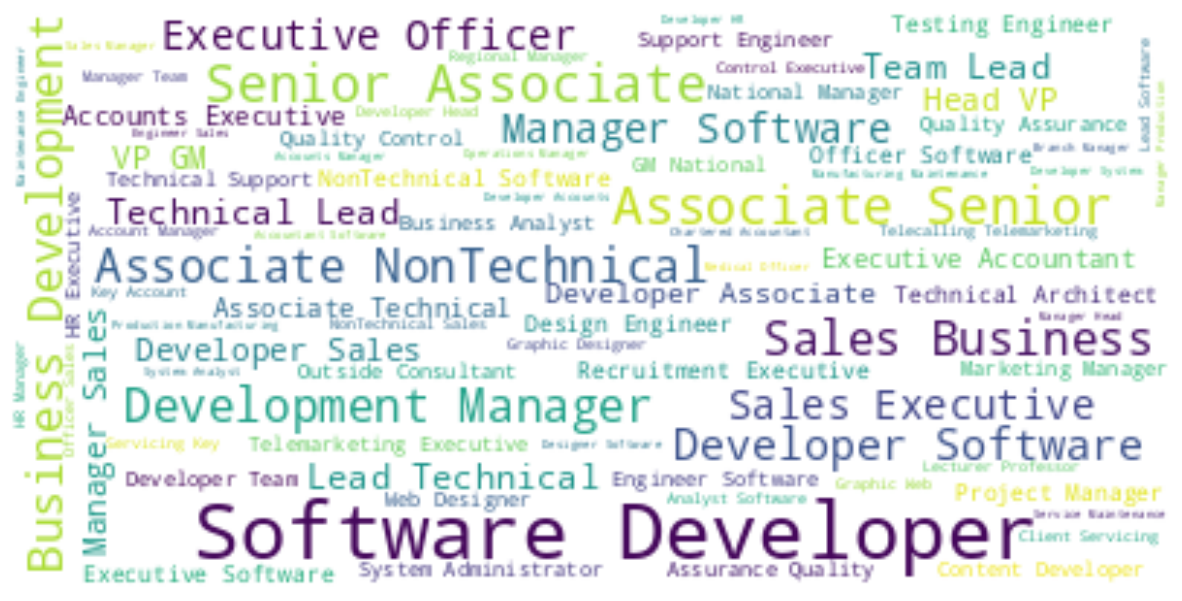

In [6]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature = data["Key Skills"].tolist()
# Join the list of strings into a single string
text = " ".join(feature)
tfidf = TfidfVectorizer(input='content', stop_words="english") # Set input to 'content'
tfidf_matrix = tfidf.fit_transform([text]) # Pass the text as a list with a single element
similarity = cosine_similarity(tfidf_matrix)

In [8]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
feature = data["Key Skills"].tolist()
text = " ".join(feature)

tfidf = TfidfVectorizer(input='content', stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    if similarity.ndim > 1:
        similarity = similarity.flatten()
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required',
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                      Job Title Job Experience Required  \
2394                        Technical Architect            6 - 10 Years   
3975                         Software Developer               0 - 1 yrs   
3508  Assistant Manager/Manager -(NonTechnical)               2 - 5 yrs   
4828                   Team Lead/Technical Lead               4 - 9 yrs   
3954         Sales/Business Development Manager               3 - 7 yrs   

                                             Key Skills  
2394                          Java|Spring|Rest Services  
3975   android| Object oriented programming| android...  
3508   Assistant Manager| senior manager| Strategy| ...  
4828                                           Core PHP  
3954   marketing executive| distributors| customer p...  
